In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data

df_entire = pd.read_csv('QualityPrediction.csv')
print(df_entire.shape)
df_entire.head(n=10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## 1. Preprocessing & Exploratory data analysis
1. Treatment of missing values
2. Remove duplicate rows
3. Merging fields (correlation)
4. Data format Handling
5. Data visualization
6. Treatment of outliers
7. Scaling

### 1.1 Treatment of missing values

In [3]:
#percentage of missing values in each column

(df_entire.isnull().sum()/df_entire.isnull().count()).sort_values(ascending=False)


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

#### Inference: There are no missing values in the data

### 1.2 Remove duplicate rows

In [4]:
df_entire = df_entire.drop_duplicates()
df_entire

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.3 Correlation coefficient measure

<AxesSubplot:>

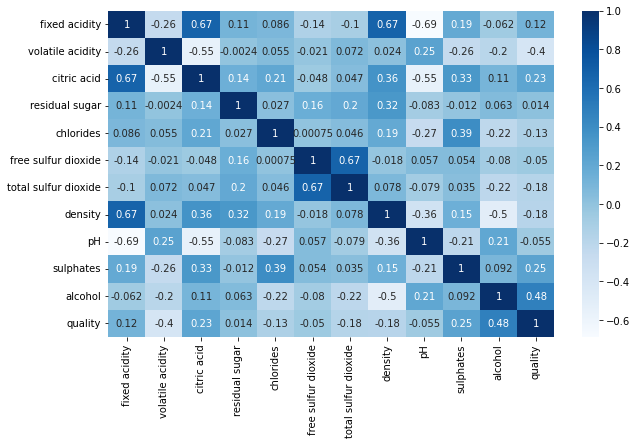

In [5]:
corr= df_entire.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues', annot=True)

### 1.4 Data format handling

In [6]:
df_entire.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### No Data format handling required.

### 1.5 Data Visualization

/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='quality'>

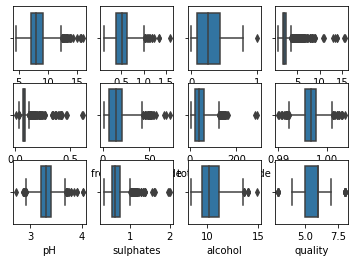

In [7]:
#sns.boxplot(x="variable", y="value", data=pd.melt(df_entire))
#warnings.filterwarnings('ignore')

f, axes = plt.subplots(3,4)
sns.boxplot(df_entire['fixed acidity'], ax=axes[0,0])
sns.boxplot(df_entire['volatile acidity'], ax=axes[0,1])
sns.boxplot(df_entire['citric acid'], ax=axes[0,2])
sns.boxplot(df_entire['residual sugar'], ax=axes[0,3])
sns.boxplot(df_entire['chlorides'], ax=axes[1,0])
sns.boxplot(df_entire['free sulfur dioxide'], ax=axes[1,1])
sns.boxplot(df_entire['total sulfur dioxide'], ax=axes[1,2])
sns.boxplot(df_entire['density'], ax=axes[1,3])
sns.boxplot(df_entire['pH'], ax=axes[2,0])
sns.boxplot(df_entire['sulphates'], ax=axes[2,1])
sns.boxplot(df_entire['alcohol'], ax=axes[2,2])
sns.boxplot(df_entire['quality'], ax=axes[2,3])

In [8]:
df_X = df_entire.drop(columns='quality')
df_Y = df_entire[['quality']]
df_X, df_Y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 5               7.4             0.660         0.00             1.8      0.075   
 ...             ...               ...          ...             ...        ...   
 1593            6.8             0.620         0.08             1.9      0.068   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [9]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
lcut = Q1 - 1.5*IQR
rcut = Q3 + 1.5*IQR
L_columns = list(df_X.columns)

for col in L_columns:
    df_X[col].loc[df_X[col] < lcut[col]] = np.median(df_X[col])
    df_X[col].loc[df_X[col] > rcut[col]] = np.median(df_X[col])

/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='alcohol'>

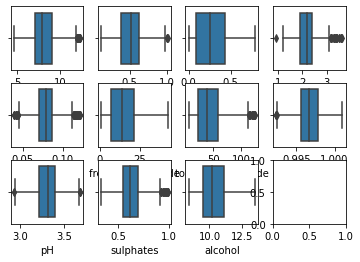

In [10]:
f, axes = plt.subplots(3,4)
sns.boxplot(df_X['fixed acidity'], ax=axes[0,0])
sns.boxplot(df_X['volatile acidity'], ax=axes[0,1])
sns.boxplot(df_X['citric acid'], ax=axes[0,2])
sns.boxplot(df_X['residual sugar'], ax=axes[0,3])
sns.boxplot(df_X['chlorides'], ax=axes[1,0])
sns.boxplot(df_X['free sulfur dioxide'], ax=axes[1,1])
sns.boxplot(df_X['total sulfur dioxide'], ax=axes[1,2])
sns.boxplot(df_X['density'], ax=axes[1,3])
sns.boxplot(df_X['pH'], ax=axes[2,0])
sns.boxplot(df_X['sulphates'], ax=axes[2,1])
sns.boxplot(df_X['alcohol'], ax=axes[2,2])

### 1.7 Scaling

<AxesSubplot:ylabel='Density'>

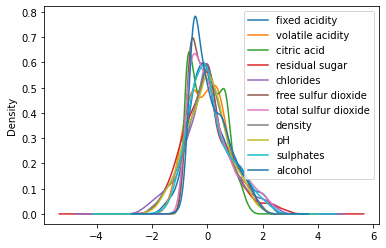

In [11]:
# Robust Scaler
## (x-Q1)/(Q3-Q1)
## Fit for data with outliers

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
data_tf = robust_scaler.fit_transform(df_X)
df_X = pd.DataFrame(data_tf, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
df_X.plot.kde()

## 2. Modeling

1. Train-Test split
2. Applying Logistic Regression
3. Applying Random-Forest Classifier
4. Applying SVM Classifier

### 2.1 Train-Test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=111, stratify=df_Y)

### 2.2 Applying Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_confusion_matrix, classification_report

In [17]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


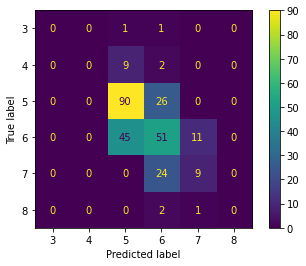

In [22]:
#prediction and evaluation
y_pred = logReg.predict(x_test)
plot_confusion_matrix(logReg, x_test, y_test)
plt.show()

In [24]:
#accuracy score

print(accuracy_score(y_test, y_pred))

0.5514705882352942


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.78      0.69       116
           6       0.48      0.48      0.48       107
           7       0.43      0.27      0.33        33
           8       0.00      0.00      0.00         3

    accuracy                           0.55       272
   macro avg       0.26      0.25      0.25       272
weighted avg       0.51      0.55      0.52       272



/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.3 Applying Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/tmp/ipykernel_101/3758756570.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [31]:
#prediction
y_pred_rf = rf.predict(x_test)

In [30]:
print("accuracy score: ", rf.score(x_test, y_test))

accuracy score:  0.5698529411764706


In [33]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.75      0.67       116
           6       0.54      0.55      0.54       107
           7       0.50      0.27      0.35        33
           8       0.00      0.00      0.00         3

    accuracy                           0.57       272
   macro avg       0.27      0.26      0.26       272
weighted avg       0.53      0.57      0.54       272



/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.4 Applying SVM Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()
svc.fit(x_train, y_train)

/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [36]:
#prediction
y_pred_svc = svc.predict(x_test)

In [37]:
print("accuracy score: ", svc.score(x_test, y_test))

accuracy score:  0.5772058823529411


In [38]:
print("classification report: ", classification_report(y_test, y_pred_svc))

classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.78      0.70       116
           6       0.52      0.57      0.54       107
           7       0.50      0.15      0.23        33
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   macro avg       0.27      0.25      0.25       272
weighted avg       0.53      0.58      0.54       272



/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/PACKAGES/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
